# 범주형 데이터, 연속형 데이터 으로 분석하기

1. 독립변수가 범주형자료이고 종속변수가 범주형자료일때 교차분석을 한다

- 교차분석이란?
- 참고사이트 : [https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=aporia25&logNo=221156141366](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=aporia25&logNo=221156141366)


교차분석(cross-tabulation analysis)은 '범주형'으로 구성된 자료들 간의 연관관계를 확인하기 위해 교차표를 만들어 관계를 확인하는 분석 방법을 말한다. 이 방법에서는 변수들의 빈도를 이용하여 연관성을 파악하는데, 이 때 검정통계량으로 카이제곱($\chi^2$) 통계량을 이용한다. 이 때문에 교차분석은 카이제곱($\chi^2$) 검정이라고도 불린다.

귀무가설: 기대도수와 관측도수 간에 차이가 없다 

대립가설: 기대도수와 관측도수 간에 차이가 있다 





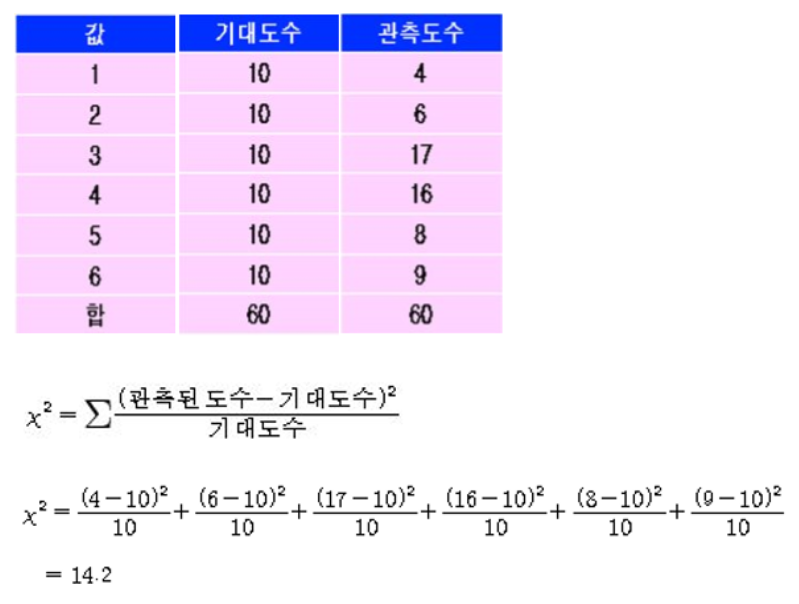

2. 독립변수가 범주형자료이고 종속변수가 연속형자료일때 t-test 또는 분산분석(ANOVA)을 한다

- 독립변수 범주가 2개일때 t-test

- 독립변수 범주가 3개 이상일때 분산분석

3. 독립변수가 연속형자료이고 종속변수가 연속형자료일때 상관관계분석 또는 
선형회귀분석을 한다

4. 독립변수가 연속형자료이고 종속변수가 범주형자료일때 로지스틱 회귀분석 또는 
판별분석 또는 군집분석을 한다

In [1]:
# 실습 예제
a <- read.csv('cosmetics.csv', header = T, sep = ',')
head(a)

gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3
2,2,2,7,3,1,2,100000,2,1,4,2,3,3,4,4,3


In [2]:
str(a)

'data.frame':	247 obs. of  17 variables:
 $ gender    : int  1 2 2 2 1 2 2 1 2 2 ...
 $ marriage  : int  1 1 2 2 2 2 1 1 2 2 ...
 $ edu       : int  4 4 4 4 6 2 6 6 4 4 ...
 $ job       : int  1 9 4 7 6 7 4 4 5 5 ...
 $ mincome   : int  2 2 3 5 5 3 5 5 2 2 ...
 $ aware     : int  2 1 1 2 2 1 1 4 2 1 ...
 $ count     : int  1 4 6 6 2 2 5 10 2 2 ...
 $ amount    : int  11000 30000 100000 65000 50000 100000 100000 39000 40000 100000 ...
 $ decision  : int  2 1 3 3 2 2 3 3 3 3 ...
 $ propensity: int  1 1 2 2 2 1 2 2 2 3 ...
 $ skin      : int  1 3 3 5 3 4 5 2 3 3 ...
 $ promo     : int  1 2 2 2 2 2 2 1 2 1 ...
 $ location  : int  2 3 2 3 3 3 3 2 3 3 ...
 $ satisf_b  : int  5 2 4 3 3 3 2 4 3 2 ...
 $ satisf_i  : int  2 3 5 4 3 4 2 4 4 3 ...
 $ satisf_al : int  2 3 4 4 3 4 3 4 4 4 ...
 $ repurchase: int  2 4 4 4 3 3 4 4 4 4 ...


In [3]:
table(a$gender)


  1   2 
132 115 

In [4]:
table(a$marriage)


  1   2 
 71 176 

In [5]:
attach(a) # $사용안해도 됨

In [6]:
table(gender)

gender
  1   2 
132 115 

In [7]:
table(job)

job
 1  2  3  4  5  6  7  8  9 10 
13 23 39 89  8 19 27 14  6  9 

In [8]:
detach(a)

In [9]:
a$gender<-factor(a$gender, levels=c(1,2), labels = c('male','female'))

In [10]:
str(a)

'data.frame':	247 obs. of  17 variables:
 $ gender    : Factor w/ 2 levels "male","female": 1 2 2 2 1 2 2 1 2 2 ...
 $ marriage  : int  1 1 2 2 2 2 1 1 2 2 ...
 $ edu       : int  4 4 4 4 6 2 6 6 4 4 ...
 $ job       : int  1 9 4 7 6 7 4 4 5 5 ...
 $ mincome   : int  2 2 3 5 5 3 5 5 2 2 ...
 $ aware     : int  2 1 1 2 2 1 1 4 2 1 ...
 $ count     : int  1 4 6 6 2 2 5 10 2 2 ...
 $ amount    : int  11000 30000 100000 65000 50000 100000 100000 39000 40000 100000 ...
 $ decision  : int  2 1 3 3 2 2 3 3 3 3 ...
 $ propensity: int  1 1 2 2 2 1 2 2 2 3 ...
 $ skin      : int  1 3 3 5 3 4 5 2 3 3 ...
 $ promo     : int  1 2 2 2 2 2 2 1 2 1 ...
 $ location  : int  2 3 2 3 3 3 3 2 3 3 ...
 $ satisf_b  : int  5 2 4 3 3 3 2 4 3 2 ...
 $ satisf_i  : int  2 3 5 4 3 4 2 4 4 3 ...
 $ satisf_al : int  2 3 4 4 3 4 3 4 4 4 ...
 $ repurchase: int  2 4 4 4 3 3 4 4 4 4 ...


In [11]:
table(a$gender)


  male female 
   132    115 

In [12]:
install.packages('descr')

package 'descr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\Rtmp8OPV9d\downloaded_packages


In [13]:
library(descr)

Warning message:
"package 'descr' was built under R version 3.6.3"

,Frequency,Percent
male,132,53.4413
female,115,46.5587
Total,247,100.0000


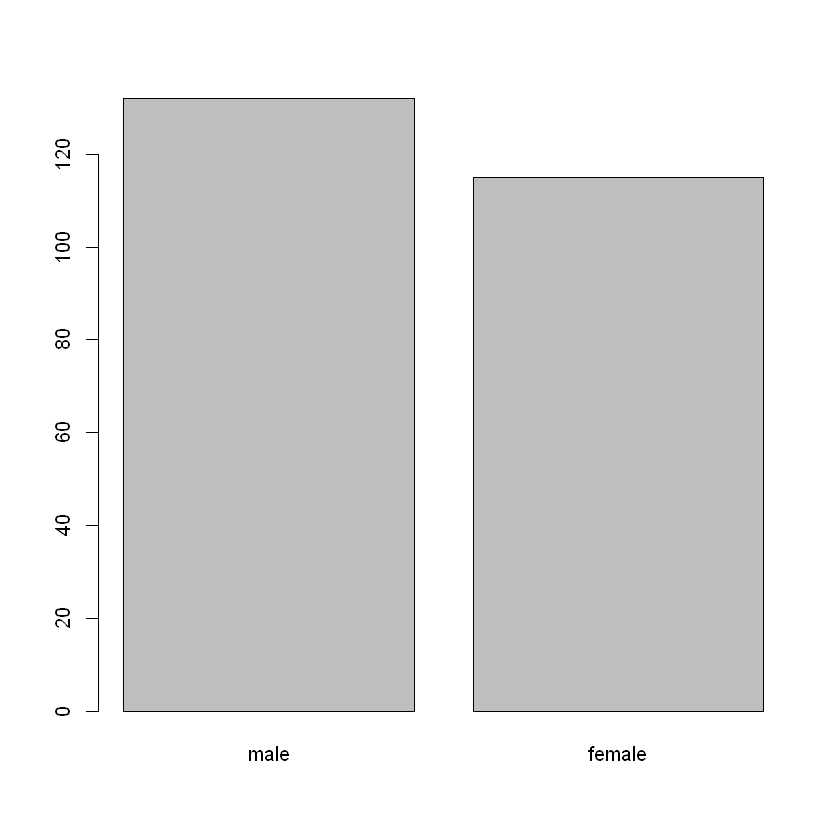

In [14]:
freq(a$gender) #freq 사용하려면 descr 라이브러리 설치해줘야 함

In [15]:
install.packages('ggplot2')
library(ggplot2)


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


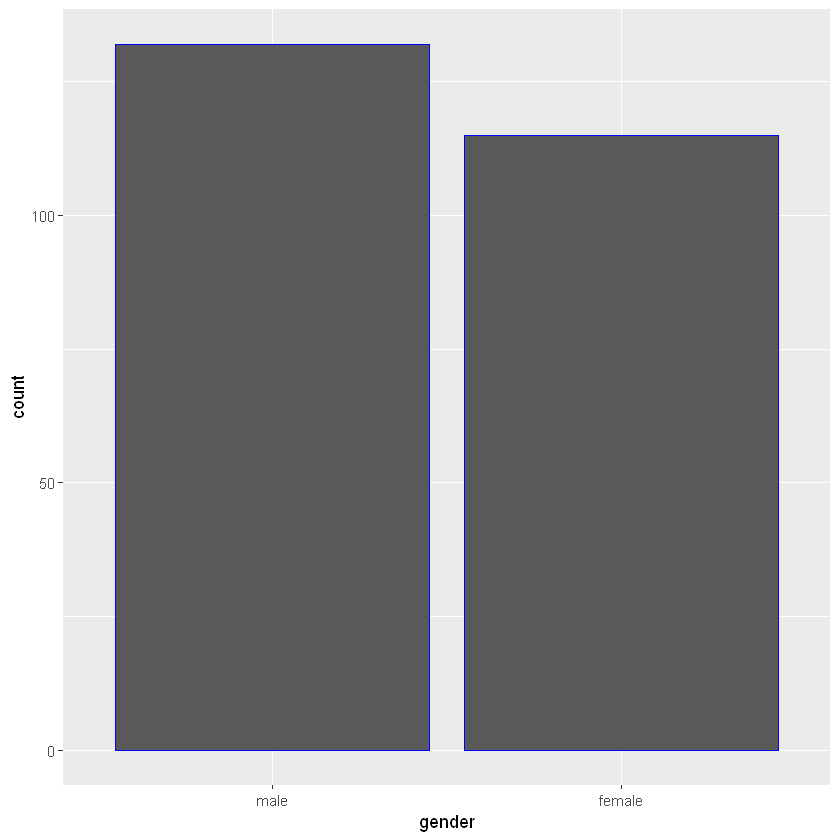

In [16]:
ggplot(a,aes(x=gender)) + geom_bar(color='blue')

In [17]:
attach(a)

,Frequency,Percent
2,30,12.1457490
3,9,3.6437247
4,136,55.0607287
5,2,0.8097166
6,29,11.7408907
7,15,6.0728745
8,26,10.5263158
Total,247,100.0000000


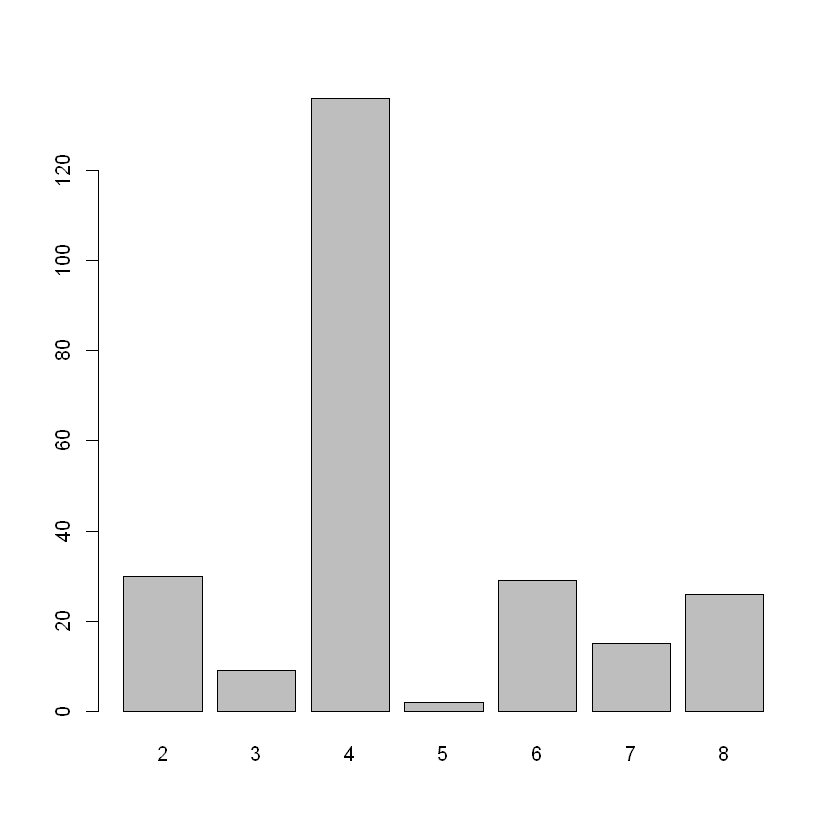

In [18]:
freq(edu)

In [19]:
install.packages('car')
library(car)

also installing the dependency 'lme4'




  There are binary versions available but the source versions are later:
     binary   source needs_compilation
lme4 1.1-26 1.1-27.1              TRUE
car  3.0-10   3.0-12             FALSE

  Binaries will be installed
package 'lme4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\Rtmp8OPV9d\downloaded_packages


installing the source package 'car'

Loading required package: carData


In [20]:
a$eduM<-recode(edu,"lo:2=1; 3:4=2; 5:hi=3; else='NA'") # edu 컬럼 그대로 두고 eduM 컬럼 만들어 준다. 2를 1로 변경 , 3~4를 2로 변경 해준다.



,Frequency,Percent
1,30,12.14575
2,145,58.70445
3,72,29.14980
Total,247,100.00000


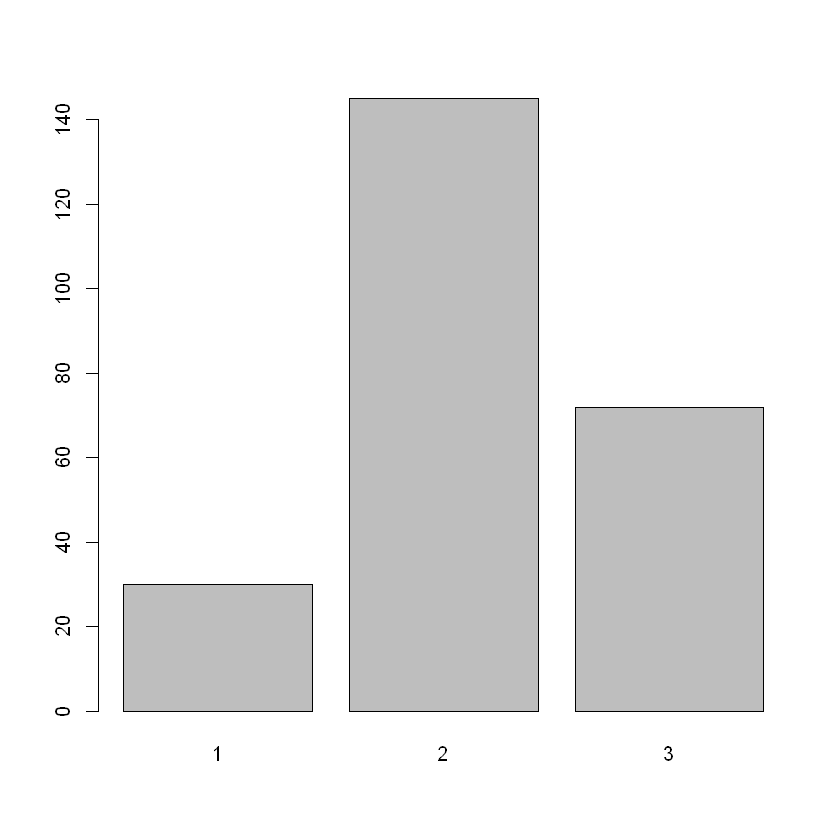

In [21]:
freq(a$eduM) #3집단으로 묶인것을 확인가능 

In [22]:
a$eduM <- factor(a$eduM, levels=c(1,2,3), labels=c('중졸이하','고졸이하','대졸이상'))

,Frequency,Percent
중졸이하,30,12.14575
고졸이하,145,58.70445
대졸이상,72,29.14980
Total,247,100.00000


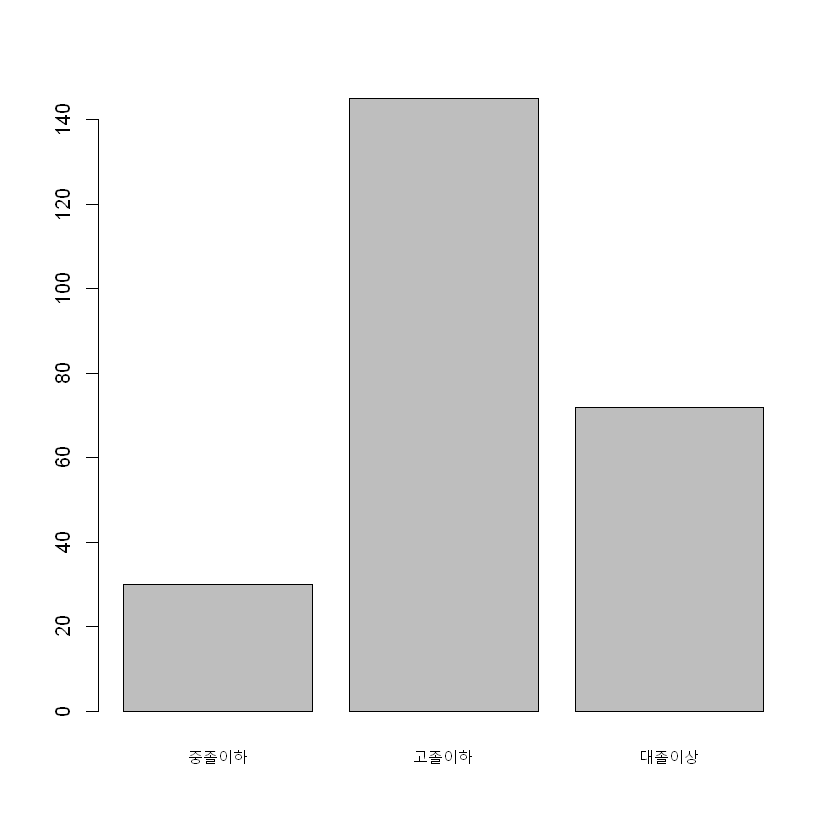

In [23]:
freq(a$eduM)

# 기술 통계

1. 중심화경향 
  
  - 평균 , 중위수 , 최빈값(Mode) => 중심은 어디인가?
  

2. 산포도 

  - 분산 : 편차의 제곱의 평균
  
  - 표준편차 : 분산에 루트를 씌운 값
  
  - 범위
  
  - 사분위범위
  
3. 분포도 
  
  - 왜도 : 좌우대칭정도
  
  - 첨도 : 뾰족함 정도 

In [24]:
attach(a)

The following objects are masked from a (pos = 5):

    amount, aware, count, decision, edu, gender, job, location,
    marriage, mincome, promo, propensity, repurchase, satisf_al,
    satisf_b, satisf_i, skin



In [25]:
max(amount)

[1] 5000000

In [28]:
min(amount)

[1] 3000

In [29]:
sum(amount)

[1] 38023000

In [30]:
mean(amount)

[1] 153939.3

In [31]:
var(amount)

[1] 158463699549

In [32]:
sd(amount)

[1] 398075

In [33]:
install.packages('psych')

also installing the dependencies 'tmvnsim', 'mnormt'




  There is a binary version available but the source version is later:
      binary source needs_compilation
psych  2.1.3  2.1.9             FALSE

package 'tmvnsim' successfully unpacked and MD5 sums checked
package 'mnormt' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\Rtmp8OPV9d\downloaded_packages


installing the source package 'psych'



In [34]:
library(psych)


Attaching package: 'psych'

The following object is masked from 'package:car':

    logit

The following objects are masked from 'package:ggplot2':

    %+%, alpha



In [35]:
describe(a)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
gender*,1,247,1.465587e+00,4.998272e-01,1,1.457286,0.0000,1,2,1,0.13714193,-1.9891964,3.180324e-02
marriage,2,247,1.712551e+00,4.534918e-01,2,1.763819,0.0000,1,2,1,-0.93360038,-1.1329280,2.885499e-02
edu,3,247,4.566802e+00,1.709191e+00,4,4.462312,0.0000,2,8,6,0.63815084,-0.3287273,1.087532e-01
job,4,247,4.578947e+00,2.199603e+00,4,4.422111,1.4826,1,10,9,0.68090959,-0.1651951,1.399574e-01
mincome,5,247,3.757085e+00,1.674079e+00,4,3.819095,1.4826,1,6,5,-0.10186401,-1.2266191,1.065191e-01
aware,6,247,3.319838e+00,5.575692e+00,2,1.924623,0.0000,1,31,30,3.98663626,15.7864331,3.547728e-01
count,7,247,4.327935e+00,4.422061e+00,3,3.492462,2.9652,1,36,35,3.08793674,13.5854742,2.813690e-01
amount,8,247,1.539393e+05,3.980750e+05,52000,83798.994975,47443.2000,3000,5000000,4997000,8.62153257,92.2401960,2.532891e+04
decision,9,247,2.388664e+00,7.615994e-01,3,2.482412,0.0000,1,3,2,-0.77786381,-0.8701841,4.845941e-02
propensity,10,247,1.975709e+00,6.803103e-01,2,1.969849,0.0000,1,3,2,0.02958183,-0.8487310,4.328711e-02


In [37]:
summary(amount)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3000   30000   52000  153939  100000 5000000 

In [43]:
aggregate(amount~gender, a, mean)

gender,amount
male,127757.6
female,183991.3


In [44]:
tapply(amount,gender, mean)

male   female 
127757.6 183991.3

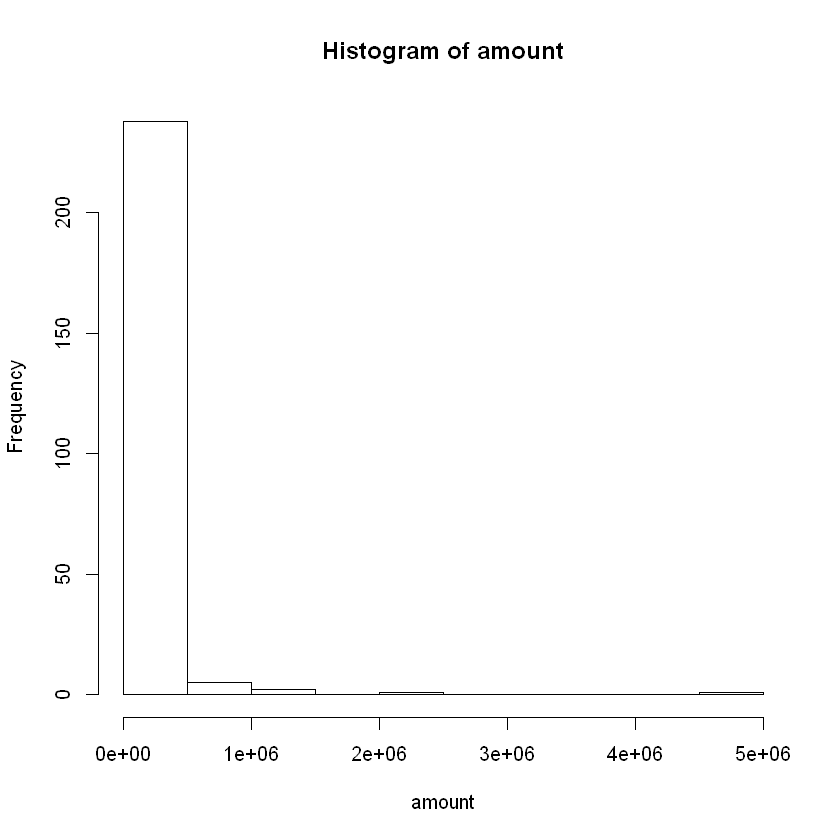

In [45]:
hist(amount)

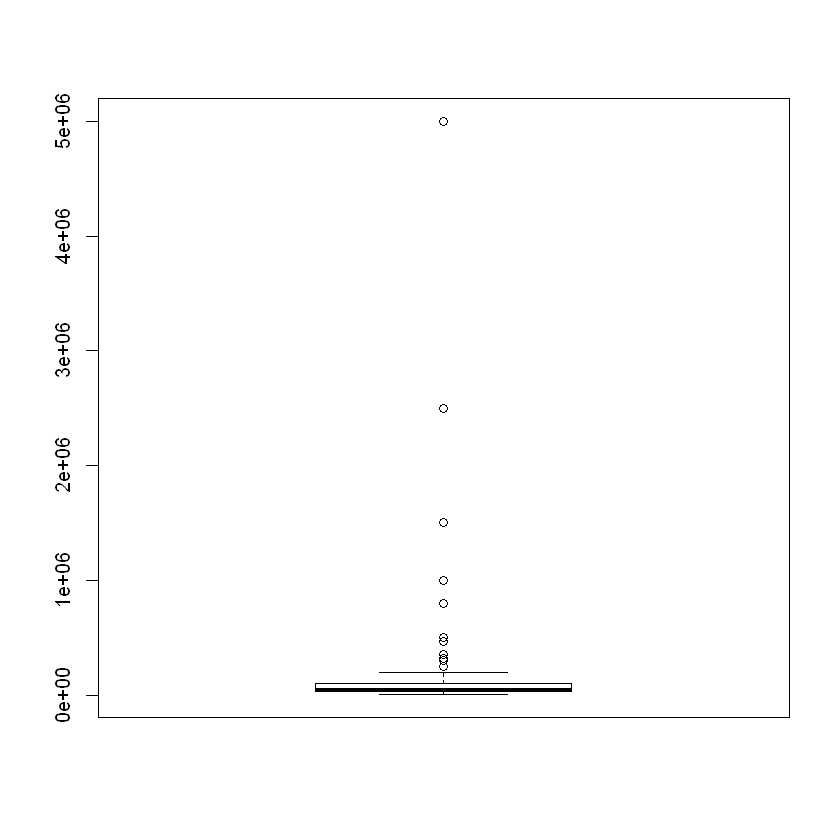

In [46]:
boxplot(amount) #이상치 판단하기

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


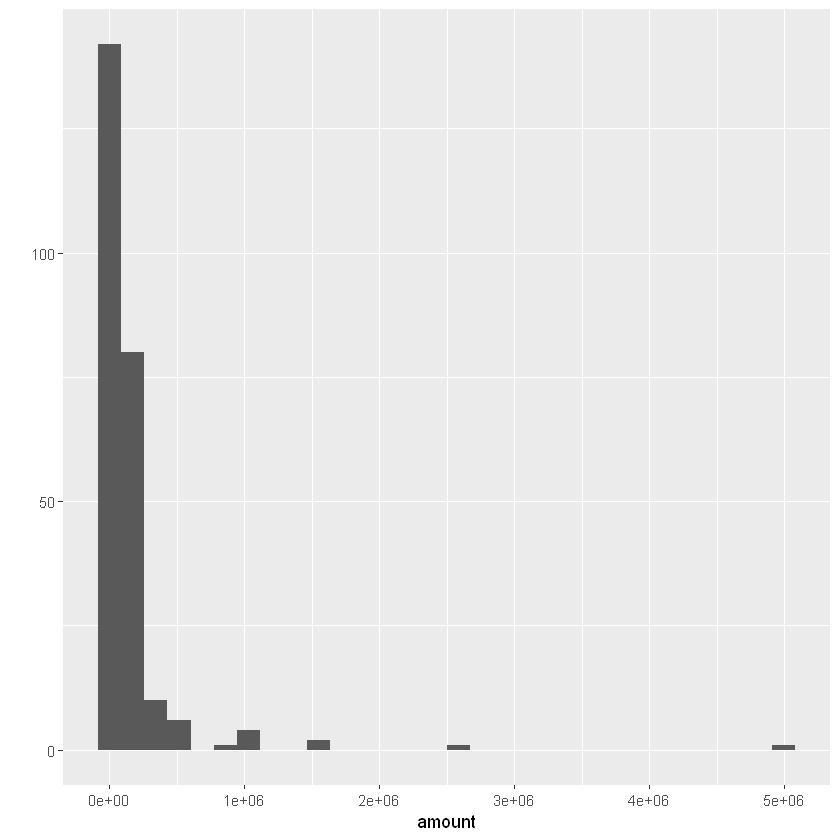

In [49]:
qplot(amount,geom='histogram')

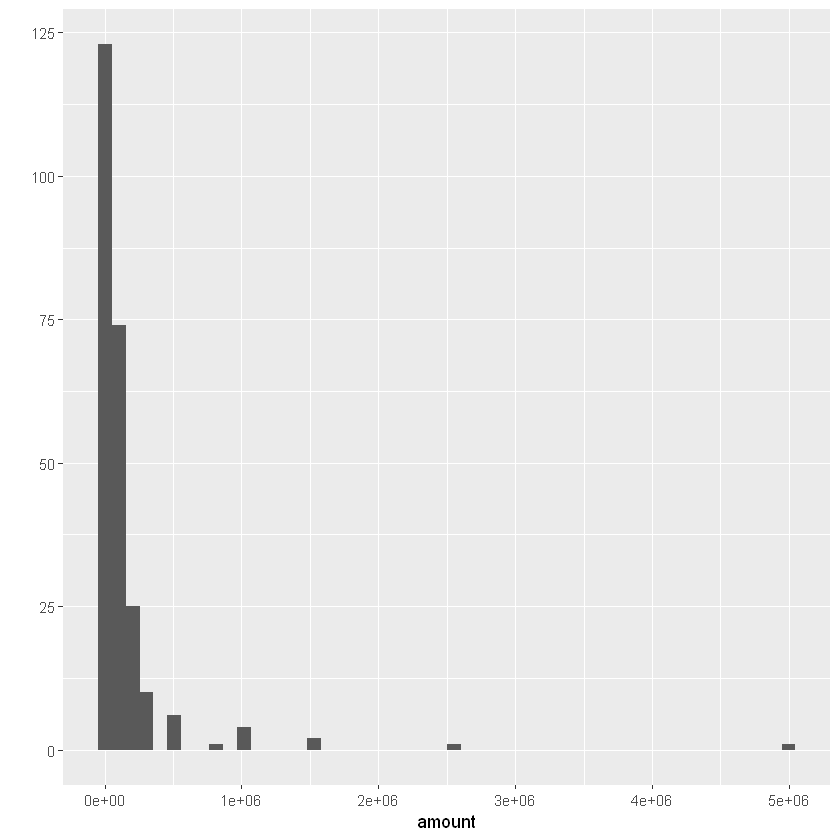

In [50]:
qplot(amount,geom='histogram',bins=50)

Warning message:
"Ignoring unknown parameters: bandwidth"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


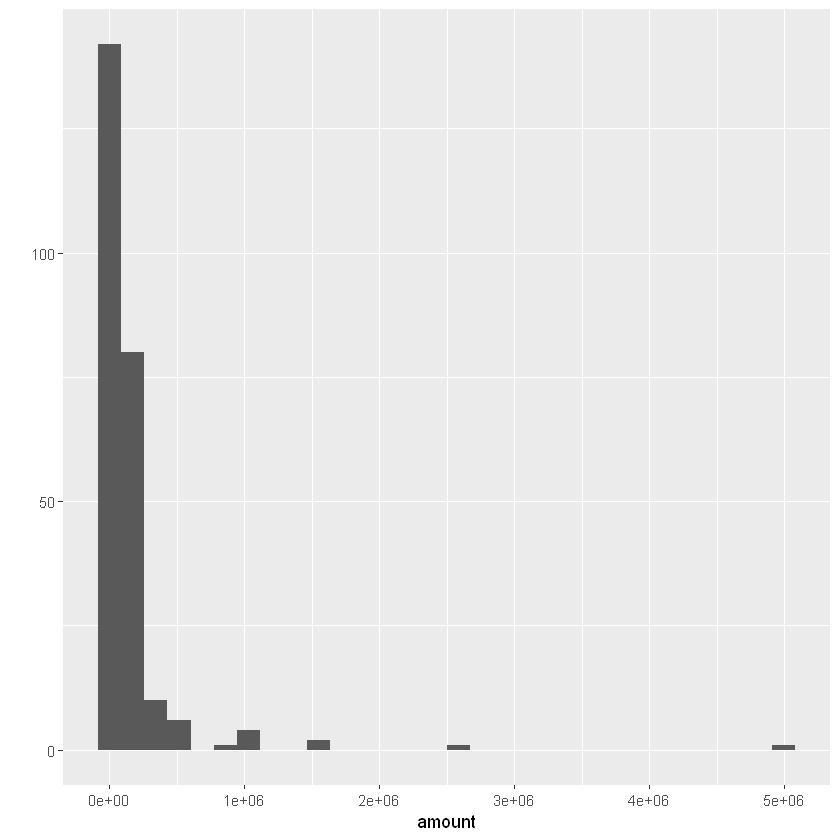

In [52]:
qplot(amount,geom='histogram',bandwidth=50)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


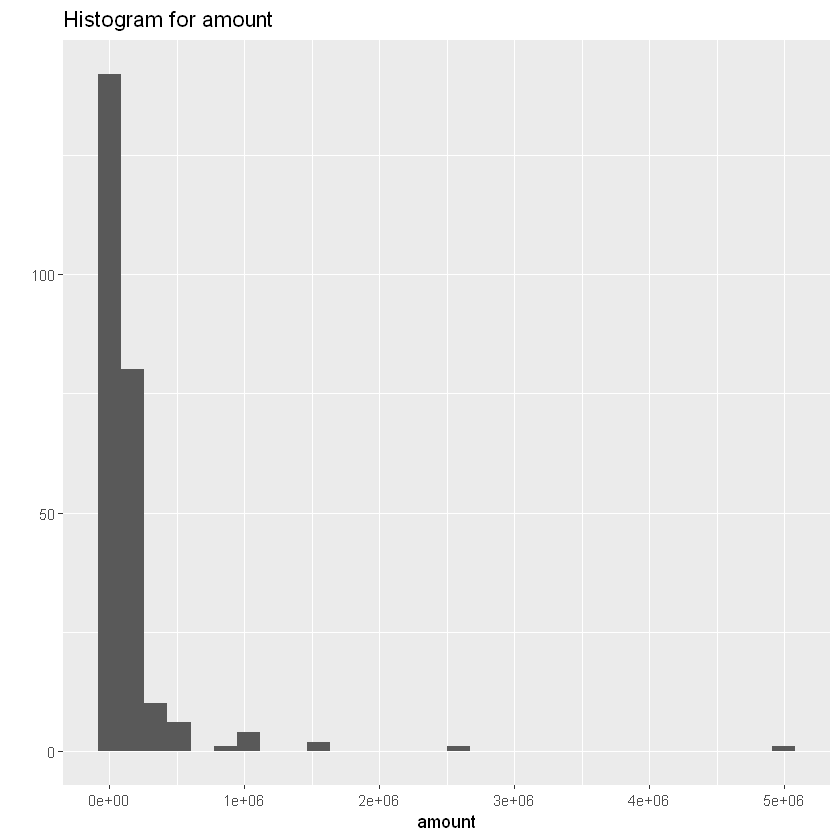

In [54]:
qplot(amount,geom='histogram',main='Histogram for amount')

# 이상치 제거

## IQR 기준 이상치 탐색 및 제거

### 이상치: Q1 값에서 IQR의 1.5배를 뺀 값보다 작은 값, Q3 값에서 IQR의 1.5배를 더한값보다 큰 값 이다 .




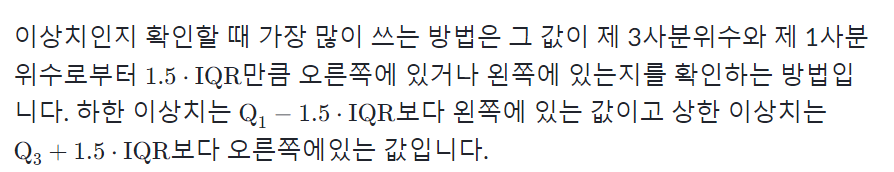

In [55]:
upQuan <- quantile(amount)[4]

In [56]:
loQuan <- quantile(amount)[2]

In [57]:
IQR=upQuan-loQuan

In [58]:
IQR

75% 
70000

In [61]:
a$amount<-ifelse(amount>upQuan+IQR*1.5 | amount <loQuan-IQR*1.5, NA, a$amount)

In [62]:
describe(a) # amount만 217이므로 이상치 제거해줘야 한다
# 이상치 제거후 71119.815668 값 줄어든것을 확인할 수 있다.

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
gender*,1,247,1.465587,4.998272e-01,1,1.457286,0.0000,1,2,1,0.13714193,-1.9891964,3.180324e-02
marriage,2,247,1.712551,4.534918e-01,2,1.763819,0.0000,1,2,1,-0.93360038,-1.1329280,2.885499e-02
edu,3,247,4.566802,1.709191e+00,4,4.462312,0.0000,2,8,6,0.63815084,-0.3287273,1.087532e-01
job,4,247,4.578947,2.199603e+00,4,4.422111,1.4826,1,10,9,0.68090959,-0.1651951,1.399574e-01
mincome,5,247,3.757085,1.674079e+00,4,3.819095,1.4826,1,6,5,-0.10186401,-1.2266191,1.065191e-01
aware,6,247,3.319838,5.575692e+00,2,1.924623,0.0000,1,31,30,3.98663626,15.7864331,3.547728e-01
count,7,247,4.327935,4.422061e+00,3,3.492462,2.9652,1,36,35,3.08793674,13.5854742,2.813690e-01
amount,8,217,71119.815668,5.355038e+04,50000,63062.857143,44478.0000,3000,200000,197000,1.16454289,0.5555427,3.635237e+03
decision,9,247,2.388664,7.615994e-01,3,2.482412,0.0000,1,3,2,-0.77786381,-0.8701841,4.845941e-02
propensity,10,247,1.975709,6.803103e-01,2,1.969849,0.0000,1,3,2,0.02958183,-0.8487310,4.328711e-02


In [66]:
a$amount<-ifelse(amount>100000, NA, a$amount)

In [67]:
describe(a)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
gender*,1,247,1.465587,4.998272e-01,1,1.457286,0.0000,1,2,1,0.13714193,-1.9891964,3.180324e-02
marriage,2,247,1.712551,4.534918e-01,2,1.763819,0.0000,1,2,1,-0.93360038,-1.1329280,2.885499e-02
edu,3,247,4.566802,1.709191e+00,4,4.462312,0.0000,2,8,6,0.63815084,-0.3287273,1.087532e-01
job,4,247,4.578947,2.199603e+00,4,4.422111,1.4826,1,10,9,0.68090959,-0.1651951,1.399574e-01
mincome,5,247,3.757085,1.674079e+00,4,3.819095,1.4826,1,6,5,-0.10186401,-1.2266191,1.065191e-01
aware,6,247,3.319838,5.575692e+00,2,1.924623,0.0000,1,31,30,3.98663626,15.7864331,3.547728e-01
count,7,247,4.327935,4.422061e+00,3,3.492462,2.9652,1,36,35,3.08793674,13.5854742,2.813690e-01
amount,8,186,53134.408602,3.040054e+04,50000,52640.000000,29652.0000,3000,100000,97000,0.39814918,-1.1001380,2.229076e+03
decision,9,247,2.388664,7.615994e-01,3,2.482412,0.0000,1,3,2,-0.77786381,-0.8701841,4.845941e-02
propensity,10,247,1.975709,6.803103e-01,2,1.969849,0.0000,1,3,2,0.02958183,-0.8487310,4.328711e-02


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 61 rows containing non-finite values (stat_bin)."

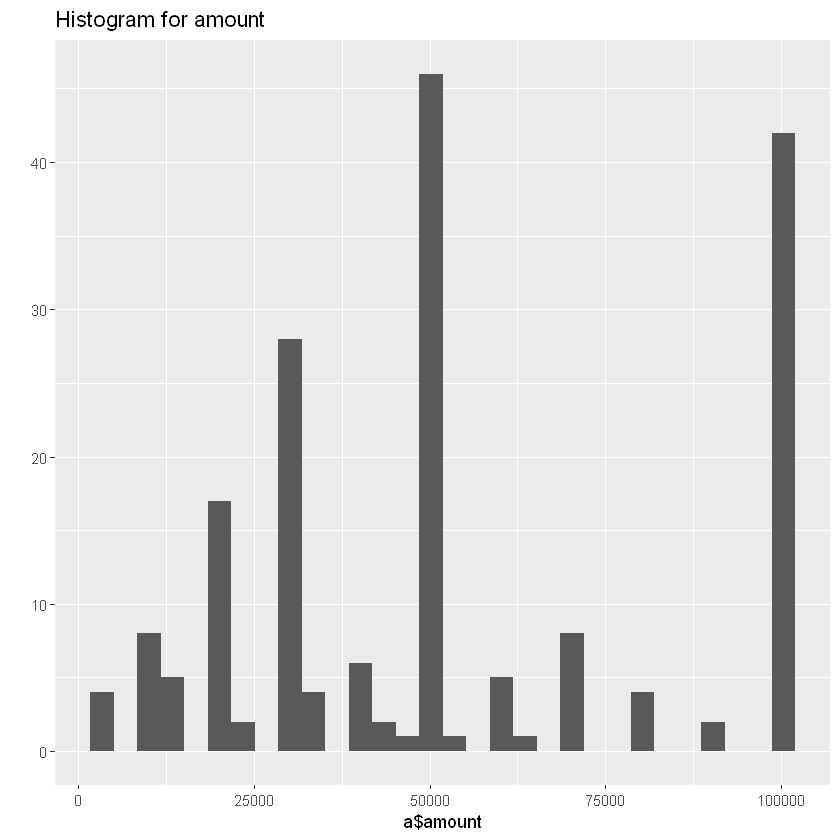

In [68]:
qplot(a$amount,geom='histogram',main='Histogram for amount')

# 표준 오차 (S.E.)

## s/root n 

### s : 동질성 ( 표준오차가 작다는 것은 그만큼 동질하다는 의미, 모집단도 동일하다는 의미)

### root n : 대표성( 표본이 많을수록 모집단의 특성을 더 많이 반영한다는 의미, 많은 표본이 표준오차가 적음)

- EX 1.

100명의  여자 대학생을 대상으로 데이트 상대 수를 구한 결과 평균 수가 4명이고 , 표준 편차 5라면, 표준오차는? 

1. 표준오차  : 5/ ROOT 100 = 0.5

2. 의미 : 평균의 차이가 0.5이므로 3.5명~4.5명에 들 가능성이 높음

# 검정통계량

- 귀무가설과 현상(데이터)간에 차이를 계산한 값이 검정통계량 이다 

- 카이제곱검정


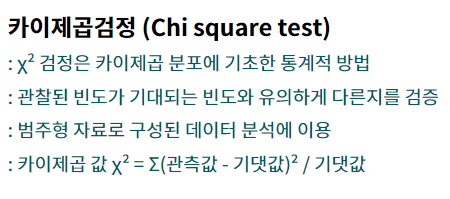

- 검정 통계량이 작다는 것은 귀무가설과 수집된 데이터 간의 차이가 작다는 것이다.


- 신뢰수준에 들 정도에 차이라면 귀무가설을 채택한다

- p-value(유의 확률, significance probability) 값이 0.05 미만이면 대립가설이 성립된다

- 검정통계량 = 차이/오차 

- 검정통계량이 클수록 대립가설이 채택될 가능성이 높다

# 교차분석 실습

In [74]:
a

gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase,eduM
male,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2,고졸이하
female,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4,고졸이하
female,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4,고졸이하
female,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4,고졸이하
male,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3,대졸이상
female,2,2,7,3,1,2,100000,2,1,4,2,3,3,4,4,3,중졸이하
female,1,6,4,5,1,5,100000,3,2,5,2,3,2,2,3,4,대졸이상
male,1,6,4,5,4,10,39000,3,2,2,1,2,4,4,4,4,대졸이상
female,2,4,5,2,2,2,40000,3,2,3,2,3,3,4,4,4,고졸이하
female,2,4,5,2,1,2,100000,3,3,3,1,3,2,3,4,4,고졸이하


In [75]:
table(propensity,skin) #구매성향 , 피부타입 ,비율알려면 액셀로 하기

          skin
propensity  1  2  3  4  5
         1 22  1 12 11 14
         2 39  8 47 16 23
         3 20 11 10  4  9

In [76]:
chisq.test(propensity, skin, correct = F) #검정통계량 

Warning message in chisq.test(propensity, skin, correct = F):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  propensity and skin
X-squared = 24.275, df = 8, p-value = 0.002061


# p-value = 0.002061 이므로 대립가설이 채택될 가능성이 높다.

In [77]:
# 성별에 따라 인지하는 정도가 다른가??

table(gender,aware)

        aware
gender    1  2  3  4  5  6  7  8 10 14 15 19 28 29 31
  male   18 83  3 10  3  0  1  2  0  3  2  0  1  0  6
  female 59 43  2  2  2  1  0  2  1  1  0  1  0  1  0

In [81]:
chisq.test(gender,aware,correct = F)

Warning message in chisq.test(gender, aware, correct = F):
"Chi-squared approximation may be incorrect"


	Pearson's Chi-squared test

data:  gender and aware
X-squared = 54.35, df = 14, p-value = 1.119e-06


In [82]:
install.packages('gmodels')

package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\Rtmp8OPV9d\downloaded_packages


In [83]:
library(gmodels)

Warning message:
"package 'gmodels' was built under R version 3.6.3"
Attaching package: 'gmodels'

The following object is masked from 'package:descr':

    CrossTable



In [85]:
CrossTable(x=propensity, y= skin, chisq=T) #카이제곱 알수있음

Warning message in chisq.test(t, correct = FALSE, ...):
"Chi-squared approximation may be incorrect"


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  247 

 
             | skin 
  propensity |         1 |         2 |         3 |         4 |         5 | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           1 |        22 |         1 |        12 |        11 |        14 |        60 | 
             |     0.274 |     3.064 |     1.352 |     1.599 |     0.715 |           | 
             |     0.367 |     0.017 |     0.200 |     0.183 |     0.233 |     0.243 | 
             |     0.272 |     0.050 |     0.174 |     0.355 |     0.304 |           | 
             |     0.089 |     0.004 |     0.049 |     0.045 |     0.057 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
           2 |      

In [86]:
cross1<-table(propensity, skin)

In [87]:
cross1

          skin
propensity  1  2  3  4  5
         1 22  1 12 11 14
         2 39  8 47 16 23
         3 20 11 10  4  9

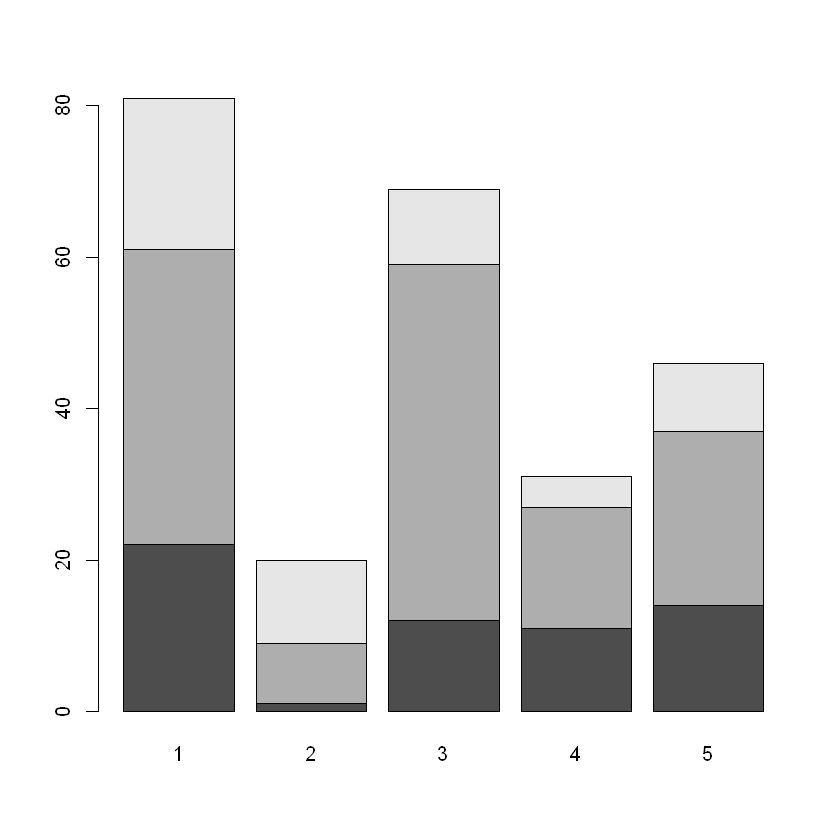

In [88]:
barplot(as.matrix(cross1))